In [1]:
from pathlib import Path
p = Path.home() / "_netrc"
print("netrc exists:", p.exists())
if p.exists():
    print("contains Earthdata host:", "urs.earthdata.nasa.gov" in p.read_text())

netrc exists: True
contains Earthdata host: True


In [3]:
from pathlib import Path
p = Path.home() / "_netrc"
print("exists:", p.exists())
if p.exists():
    txt = p.read_text()
    print("has login line:", "login " in txt)
    print("has password line:", "password " in txt)

exists: True
has login line: True
has password line: True


In [6]:
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pip"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "earthaccess", "requests"])
print("installed to:", sys.executable)

installed to: c:\Users\amishavandithadell\miniconda3\envs\sharkenv\python.exe


In [7]:
import earthaccess
print("earthaccess:", earthaccess.__version__)
auth = earthaccess.login(strategy="netrc")
print("login OK")

c:\Users\amishavandithadell\miniconda3\envs\sharkenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


earthaccess: 0.14.0
login OK


In [ ]:
# ...existing code...
from pathlib import Path

p = Path.home() / "_netrc"
print("netrc exists:", p.exists())
if p.exists():
    contains = "urs.earthdata.nasa.gov" in p.read_text()
    print("contains Earthdata host:", contains)
# ...existing code...

In [ ]:
import sys, os
from pathlib import Path

p = Path.home() / "_netrc"
print("Kernel python:", sys.executable)
print("Platform:", sys.platform)
print("_netrc path:", p)
print("exists:", p.exists())

if p.exists():
    txt = p.read_text()
    lines = txt.splitlines()
    safe = []
    for L in lines[:20]:
        if L.strip().lower().startswith("password"):
            safe.append("password [HIDDEN]")
        else:
            safe.append(L)
    print("\n_preview (first lines):\n" + "\n".join(safe))
    st = os.stat(p)
    print("\nfile mode:", oct(st.st_mode)[-3:], "size:", st.st_size)
else:
    print("No _netrc found in home directory.")

In [1]:
import sys
print("hello")
print("python executable:", sys.executable)
print("python version:", sys.version)

hello
python executable: c:\Users\amishavandithadell\miniconda3\envs\sharkenv\python.exe
python version: 3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]


In [5]:
import inspect, earthaccess
print(inspect.getsource(earthaccess.search_data))

def search_data(count: int = -1, **kwargs: Any) -> List[DataGranule]:
    """Search dataset granules using NASA's CMR.

    [https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html](https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html)

    Parameters:
        count: Number of records to get, -1 = all
        kwargs (Dict):
            arguments to CMR:

            * **short_name**: dataset short name, e.g. ATL08
            * **version**: dataset version
            * **doi**: DOI for a dataset
            * **daac**: e.g. NSIDC or PODAAC
            * **provider**: particular to each DAAC, e.g. POCLOUD, LPDAAC etc.
            * **temporal**: a tuple representing temporal bounds in the form
              `(date_from, date_to)`
            * **bounding_box**: a tuple representing spatial bounds in the form
              `(lower_left_lon, lower_left_lat, upper_right_lon, upper_right_lat)`

    Returns:
        a list of DataGranules that can be used to access the gr

In [6]:
import earthaccess

candidates = [
    "MODISA_L3m_CHL", "MODIS_Aqua_L2", "MODIS_Aqua_L3", "VIIRS_SNPP_CHL",
    "OCI_L2_CHL", "OCI_L3_CHL", "SeaWiFS_L3_CHL", "VIIRS_SNPP_L3"
]

found = {}
for s in candidates:
    try:
        res = earthaccess.search_data(short_name=s, cloud_hosted=True, count=1)
        found[s] = len(res)
    except Exception as e:
        found[s] = f"error: {type(e).__name__}"
print("Results (collection: count or error):")
for k,v in found.items():
    print(k, " -> ", v)

Results (collection: count or error):
MODISA_L3m_CHL  ->  1
MODIS_Aqua_L2  ->  0
MODIS_Aqua_L3  ->  0
VIIRS_SNPP_CHL  ->  0
OCI_L2_CHL  ->  0
OCI_L3_CHL  ->  0
SeaWiFS_L3_CHL  ->  0
VIIRS_SNPP_L3  ->  0


In [13]:
granules = earthaccess.search_data(
    short_name="MODISA_L3m_CHL",
    cloud_hosted=True,
    temporal=("2024-06-01","2024-06-30"),
    count=20
)

In [18]:
import sys
import xarray
import netCDF4
print("sys.executable:", sys.executable)
print("xarray:", xarray.__version__)
print("netCDF4:", netCDF4.__version__)

sys.executable: c:\Users\amishavandithadell\miniconda3\envs\sharkenv\python.exe
xarray: 2025.6.1
netCDF4: 1.7.3


In [20]:
import os, pprint, glob, earthaccess

print("CWD:", os.getcwd())
print("Files in CWD (top 50):")
print(sorted(os.listdir("."))[:50])

# Re-run the same download request you used before (uses `granules` variable)
to_download = granules[:1]
print("Requesting download for", len(to_download), "item(s)...")
result = earthaccess.download(to_download)
print("\nRaw download result (pprint):")
pprint.pprint(result)

# If result contains producer_granule_id or dict entries, print keys for first element
if isinstance(result, (list, tuple)) and len(result):
    first = result[0]
    print("\nType of first result item:", type(first))
    if isinstance(first, dict):
        print("Keys in first result item:", list(first.keys()))
        # try to print any plausible local path fields
        for k in ("local_path","local_file","path","file","href","url"):
            if k in first:
                print(f"Found field {k}:", first[k])

CWD: c:\Users\amishavandithadell\Music\Sharks
Files in CWD (top 50):
['.venv', 'create_shark_notebook.py', 'shark_Foraging_LongTerm.ipynb']
Requesting download for 1 item(s)...


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:11<00:00, 11.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<?, ?it/s]



Raw download result (pprint):
['c:\\Users\\amishavandithadell\\Music\\Sharks\\data\\2025-10-24-65c330\\AQUA_MODIS.20020704_20250228.L3m.CU.CHL.chlor_a.9km.nc']

Type of first result item: <class 'str'>


In [21]:
import xarray as xr
fn = r"c:\Users\amishavandithadell\Music\Sharks\data\2025-10-24-65c330\AQUA_MODIS.20020704_20250228.L3m.CU.CHL.chlor_a.9km.nc"
ds = xr.open_dataset(fn, engine="netcdf4")
print(ds)
print("Variables:", list(ds.data_vars))

<xarray.Dataset> Size: 37MB
Dimensions:  (lat: 2160, lon: 4320, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 9kB 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * lon      (lon) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 37MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/64)
    product_name:                      AQUA_MODIS.20020704_20250228.L3m.CU.CH...
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    source:                            satellite observations from MODIS-Aqua
    ...                                ...
    identifier_product_doi:            10.5067/AQUA/MODIS/L3M/CHL/2022
    keywords:                          Earth

Matplotlib is building the font cache; this may take a moment.


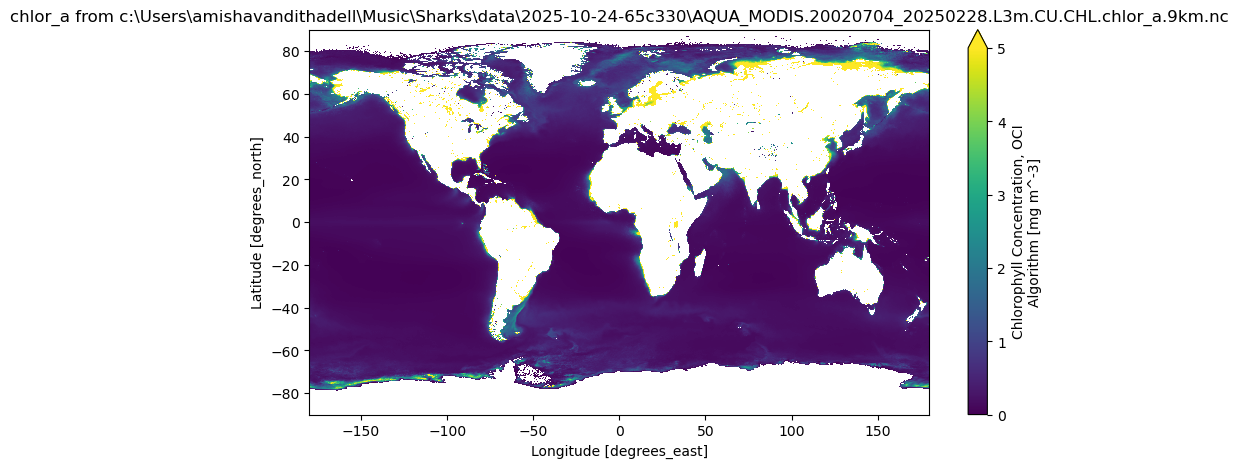

In [23]:
import matplotlib.pyplot as plt

# replace 'chlor_a' below with the actual variable name printed above if needed
var = "chlor_a"
if var not in ds.data_vars:
    var = list(ds.data_vars)[0]

da = ds[var]
if "time" in da.dims:
    da = da.isel(time=0)

plt.figure(figsize=(10,5))
im = da.plot(cmap="viridis", vmin=0, vmax=5)
plt.title(f"{var} from {fn.split('/')[-1]}")
plt.show()

In [25]:
import glob, os, pprint

root = r"c:\Users\amishavandithadell\Music\Sharks"
matches = sorted(glob.glob(os.path.join(root, "**", "*MODIS*.nc"), recursive=True), key=os.path.getmtime, reverse=True)
print("Search root:", root)
print("Found files (top 20):")
pprint.pprint(matches[:20])
# If none appear, also list any recent files under root
if not matches:
    recent = sorted(glob.glob(os.path.join(root, "**", "*"), recursive=True), key=os.path.getmtime, reverse=True)[:50]
    print("\nNo MODIS .nc found. Showing recent files instead:")
    pprint.pprint(recent)

Search root: c:\Users\amishavandithadell\Music\Sharks
Found files (top 20):
['c:\\Users\\amishavandithadell\\Music\\Sharks\\data\\2025-10-24-65c330\\AQUA_MODIS.20020704_20250228.L3m.CU.CHL.chlor_a.9km.nc']


In [26]:
import os, shutil

found = r"c:\\Users\\amishavandithadell\\Music\\Sharks\\data\\2025-10-24-65c330\\AQUA_MODIS.20020704_20250228.L3m.CU.CHL.chlor_a.9km.nc"   # replace with the exact path from Step 1
dst_dir = os.path.abspath("data/raw/shark")
os.makedirs(dst_dir, exist_ok=True)
dst = os.path.join(dst_dir, os.path.basename(found))
shutil.copy2(found, dst)
print("Copied to", dst)

Copied to c:\Users\amishavandithadell\Music\Sharks\data\raw\shark\AQUA_MODIS.20020704_20250228.L3m.CU.CHL.chlor_a.9km.nc


In [27]:
import numpy as np, xarray as xr, pandas as pd

fn = r"c:\\Users\\amishavandithadell\\Music\\Sharks\\data\\2025-10-24-65c330\\AQUA_MODIS.20020704_20250228.L3m.CU.CHL.chlor_a.9km.nc"   # exact path
tag_lon, tag_lat, tag_time = -70.0, 30.0, "2002-07-04T12:00:00"

ds = xr.open_dataset(fn, engine="netcdf4", decode_times=True, decode_coords=True)
var = "chlor_a" if "chlor_a" in ds.data_vars else list(ds.data_vars)[0]
da = ds[var]

if "time" in da.dims:
    t = np.datetime64(tag_time)
    idx = int(np.abs(ds["time"].values - t).argmin())
    da_slice = da.isel(time=idx)
    sat_time = str(ds["time"].values[idx])
else:
    da_slice = da
    sat_time = None

chl_nearest = da_slice.sel(lon=tag_lon, lat=tag_lat, method="nearest").values.item()
try:
    chl_bilinear = da_slice.interp(lon=tag_lon, lat=tag_lat).values.item()
except Exception:
    chl_bilinear = None

df = pd.DataFrame([{
    "tag_lon": tag_lon, "tag_lat": tag_lat, "tag_time": tag_time,
    "sat_time": sat_time, "chl_nearest": chl_nearest, "chl_bilinear": chl_bilinear
}])
print(df)

   tag_lon  tag_lat             tag_time sat_time  chl_nearest chl_bilinear
0    -70.0     30.0  2002-07-04T12:00:00     None     0.069045         None


In [28]:
import os
out_csv = "data/processed/shark_chl_samples.csv"
os.makedirs(os.path.dirname(out_csv), exist_ok=True)

# `df` is the DataFrame you already printed with cols: tag_lon, tag_lat, tag_time_utc, sat_time, chl_nearest, chl_bilinear
if not os.path.exists(out_csv):
    df.to_csv(out_csv, index=False)
else:
    df.to_csv(out_csv, mode="a", header=False, index=False)

print("Saved to", out_csv)

Saved to data/processed/shark_chl_samples.csv


In [29]:
import numpy as np, xarray as xr, pandas as pd

def sample_chl_from_file(fn, lon, lat, time_iso=None, varname=None):
    ds = xr.open_dataset(fn, engine="netcdf4", decode_times=True, decode_coords=True)
    if varname is None:
        varname = "chlor_a" if "chlor_a" in ds.data_vars else list(ds.data_vars)[0]
    da = ds[varname]

    if time_iso is not None and "time" in da.dims:
        t = np.datetime64(time_iso)
        tidx = int(np.abs(ds["time"].values - t).argmin())
        da_slice = da.isel(time=tidx)
        sat_time = str(ds["time"].values[tidx])
    else:
        da_slice = da
        sat_time = None

    chl_nearest = float(da_slice.sel(lon=lon, lat=lat, method="nearest").values)
    try:
        chl_bilinear = float(da_slice.interp(lon=lon, lat=lat).values)
    except Exception:
        chl_bilinear = None

    return {"tag_lon": lon, "tag_lat": lat, "tag_time_utc": time_iso, "sat_time": sat_time,
            "chl_nearest": chl_nearest, "chl_bilinear": chl_bilinear}

In [34]:
# run in the same notebook (kernel: Python (sharkenv))
import pandas as pd, glob, os, numpy as np, xarray as xr

# 1. Load your existing tags_df (already loaded in memory) or reload CSV
# If tags_df already exists from previous cell, use it; otherwise uncomment the load line:
# tags_df = pd.read_csv("path/to/your/tags.csv")

# 2. Rename columns to expected names
cols_map = {"tag_lon":"lon", "tag_lat":"lat", "tag_time":"time"}
tags_df = tags_df.rename(columns=cols_map)
print("Columns after rename:", list(tags_df.columns))
print(tags_df.head())

# 3. Find satellite file(s)
files = sorted(glob.glob(os.path.join("data","raw","shark","*.nc")), key=os.path.getmtime, reverse=True)
if not files:
    raise FileNotFoundError("No satellite .nc files found in data/raw/shark. Copy or download files first.")
sat_file = files[0]
print("Using satellite file:", sat_file)

# 4. Sampling function (safe for time/no-time fields)
def sample_chl_from_file(fn, lon, lat, time_iso=None, varname=None):
    ds = xr.open_dataset(fn, engine="netcdf4", decode_times=True, decode_coords=True)
    if varname is None:
        varname = "chlor_a" if "chlor_a" in ds.data_vars else list(ds.data_vars)[0]
    da = ds[varname]
    if time_iso is not None and "time" in da.dims:
        t = np.datetime64(time_iso)
        tidx = int(np.abs(ds["time"].values - t).argmin())
        da_slice = da.isel(time=tidx)
        sat_time = str(ds["time"].values[tidx])
    else:
        da_slice = da
        sat_time = None
    chl_nearest = float(da_slice.sel(lon=lon, lat=lat, method="nearest").values)
    try:
        chl_bilinear = float(da_slice.interp(lon=lon, lat=lat).values)
    except Exception:
        chl_bilinear = None
    return {"lon": lon, "lat": lat, "time": time_iso, "sat_time": sat_time,
            "chl_nearest": chl_nearest, "chl_bilinear": chl_bilinear}

# 5. Run sampling for all rows (vectorized loop)
results = []
for _, row in tags_df.iterrows():
    res = sample_chl_from_file(sat_file, float(row['lon']), float(row['lat']), row.get('time'))
    results.append(res)

samples_df = pd.DataFrame(results)
print("Sampled results:\n", samples_df.head())

# 6. Save output
out_csv = "data/processed/shark_chl_samples_bulk.csv"
os.makedirs(os.path.dirname(out_csv), exist_ok=True)
samples_df.to_csv(out_csv, index=False)
print("Saved samples to", out_csv)

Columns after rename: ['lon', 'lat', 'time', 'sat_time', 'chl_nearest', 'chl_bilinear']
    lon   lat                 time  sat_time  chl_nearest  chl_bilinear
0 -70.0  30.0  2002-07-04T12:00:00       NaN     0.069045           NaN
Using satellite file: data\raw\shark\AQUA_MODIS.20020704_20250228.L3m.CU.CHL.chlor_a.9km.nc
Sampled results:
     lon   lat                 time sat_time  chl_nearest chl_bilinear
0 -70.0  30.0  2002-07-04T12:00:00     None     0.069045         None
Saved samples to data/processed/shark_chl_samples_bulk.csv


In [35]:
import pandas as pd
out = "data/processed/shark_chl_samples_bulk.csv"
print("Exists:", os.path.exists(out))
print(pd.read_csv(out).head())

Exists: True
    lon   lat                 time  sat_time  chl_nearest  chl_bilinear
0 -70.0  30.0  2002-07-04T12:00:00       NaN     0.069045           NaN


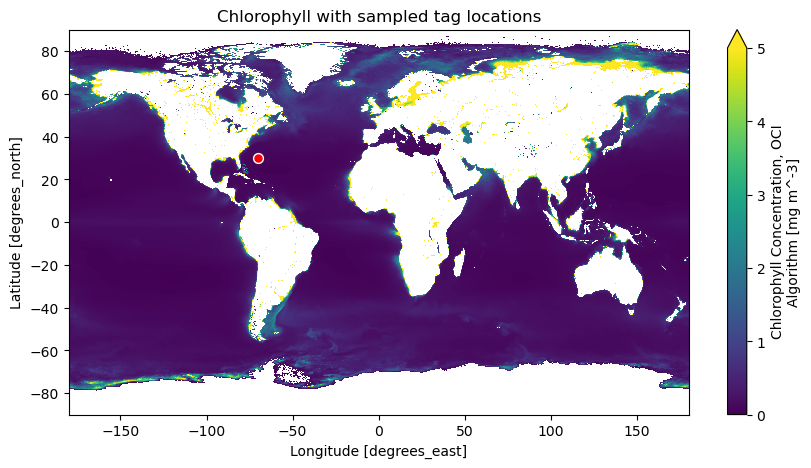

In [36]:
import xarray as xr
import matplotlib.pyplot as plt

fn = r"data\raw\shark\AQUA_MODIS.20020704_20250228.L3m.CU.CHL.chlor_a.9km.nc"
ds = xr.open_dataset(fn, engine="netcdf4", decode_times=True, decode_coords=True)
var = "chlor_a" if "chlor_a" in ds.data_vars else list(ds.data_vars)[0]
da = ds[var]
da_plot = da.isel(time=0) if "time" in da.dims else da

plt.figure(figsize=(10,5))
da_plot.plot(cmap="viridis", vmin=0, vmax=5)
plt.scatter(samples_df['lon'], samples_df['lat'], c='red', s=50, edgecolor='white')
plt.title('Chlorophyll with sampled tag locations')
plt.show()

In [37]:
import numpy as np
samples_df['chl_nearest'] = samples_df['chl_nearest'].where((samples_df['chl_nearest']>0) & (samples_df['chl_nearest']<1000))

In [38]:
samples_df['flag_outside'] = samples_df['chl_bilinear'].isna() & samples_df['chl_nearest'].notna()

In [39]:
import os, glob, numpy as np
def choose_file_for_time(tag_time, files):
    times = [np.datetime64(os.path.basename(f).split('.')[1][:8], 'D') for f in files]  # adjust parsing to your filenames
    t = np.datetime64(tag_time)
    idx = int(np.abs(np.array(times) - t).argmin())
    return files[idx]

In [40]:
samples_df['sat_file'] = sat_file
samples_df.to_csv("data/processed/shark_chl_samples_bulk.csv", index=False)

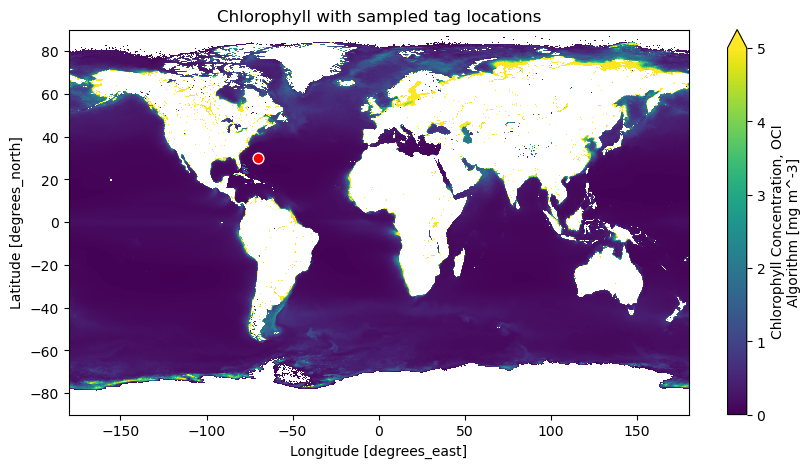

In [41]:
import xarray as xr, matplotlib.pyplot as plt, os
fn = r"data\raw\shark\AQUA_MODIS.20020704_20250228.L3m.CU.CHL.chlor_a.9km.nc"
ds = xr.open_dataset(fn, engine="netcdf4", decode_times=True, decode_coords=True)
var = "chlor_a" if "chlor_a" in ds.data_vars else list(ds.data_vars)[0]
da = ds[var]
da_plot = da.isel(time=0) if "time" in da.dims else da

plt.figure(figsize=(10,5))
da_plot.plot(cmap="viridis", vmin=0, vmax=5)
plt.scatter(tags_df['lon'], tags_df['lat'], c='red', s=60, edgecolor='white', zorder=5)
plt.title('Chlorophyll with sampled tag locations')
plt.show()

In [42]:
import os, glob, pandas as pd
files = sorted(glob.glob(os.path.join("data","raw","shark","*.nc")), key=os.path.getmtime, reverse=True)
sat_file = files[0]
from math import isnan

def sample_row_to_dict(row):
    return sample_chl_from_file(sat_file, float(row['lon']), float(row['lat']), row.get('time'))

results = [sample_row_to_dict(row) for _, row in tags_df.iterrows()]
samples_df = pd.DataFrame(results)
samples_df['sat_file'] = sat_file
out = "data/processed/shark_chl_samples_bulk.csv"
os.makedirs(os.path.dirname(out), exist_ok=True)
samples_df.to_csv(out, index=False)
print("Wrote", out)
print(samples_df.head())

Wrote data/processed/shark_chl_samples_bulk.csv
    lon   lat                 time sat_time  chl_nearest chl_bilinear  \
0 -70.0  30.0  2002-07-04T12:00:00     None     0.069045         None   

                                            sat_file  
0  data\raw\shark\AQUA_MODIS.20020704_20250228.L3...  


In [43]:
import numpy as np
out = "data/processed/shark_chl_samples_bulk.csv"
df = pd.read_csv(out)
df['chl_nearest'] = pd.to_numeric(df['chl_nearest'], errors='coerce')
df.loc[(df['chl_nearest']<=0) | (df['chl_nearest']>1000), 'chl_nearest'] = np.nan
df['flag_outside'] = df['chl_bilinear'].isna() & df['chl_nearest'].notna()
df.to_csv(out, index=False)
print("QC applied. Rows flagged:", df['flag_outside'].sum())
print(df.head())

QC applied. Rows flagged: 1
    lon   lat                 time  sat_time  chl_nearest  chl_bilinear  \
0 -70.0  30.0  2002-07-04T12:00:00       NaN     0.069045           NaN   

                                            sat_file  flag_outside  
0  data\raw\shark\AQUA_MODIS.20020704_20250228.L3...          True  


In [44]:
import os, glob, numpy as np
files = sorted(glob.glob(os.path.join("data","raw","shark","*.nc")))
def file_date(f):
    # adjust parsing if your filenames differ; this expects YYYYMMDD in second token
    base = os.path.basename(f)
    parts = base.split('.')
    return np.datetime64(parts[1][:8])
def choose_file_for_time(tag_time):
    times = np.array([file_date(f) for f in files])
    t = np.datetime64(tag_time)
    idx = int(np.abs(times - t).argmin())
    return files[idx]
# Example: choose_file_for_time("2002-07-04T12:00:00")

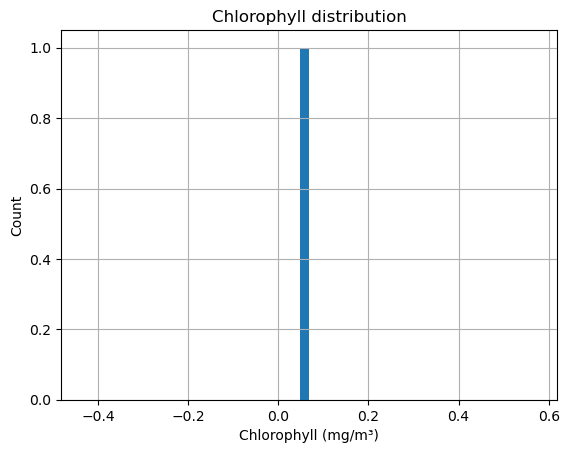

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd  # optional for coastlines

samples = pd.read_csv("data/processed/shark_chl_samples_bulk.csv")
samples['chl_nearest'].hist(bins=50)
plt.title('Chlorophyll distribution')
plt.xlabel('Chlorophyll (mg/m³)')
plt.ylabel('Count')
plt.show()

In [3]:
import pandas as pd
df = pd.read_csv("data/processed/shark_chl_samples_bulk.csv")
df['chl_valid'] = df['chl_nearest'].apply(lambda x: x if 0 < x < 1000 else None)
df.to_csv("data/processed/shark_chl_samples_clean.csv", index=False)
print("Cleaned and saved ✅")

Cleaned and saved ✅


In [8]:
import pandas as pd

# Replace this with your actual file path
tag_file = r"C:\Users\amishavandithadell\Music\Sharks\data\processed\shark_chl_samples.csv"
tags = pd.read_csv(tag_file)
print("Loaded tags shape:", tags.shape)
print(tags.head())

Loaded tags shape: (1, 6)
   tag_lon  tag_lat             tag_time  sat_time  chl_nearest  chl_bilinear
0    -70.0     30.0  2002-07-04T12:00:00       NaN     0.069045           NaN


In [11]:
import os, glob
import numpy as np
import pandas as pd
import xarray as xr

# files and inputs
sat_files = sorted(glob.glob(os.path.join("data","raw","shark","*.nc")))
if not sat_files:
    raise FileNotFoundError("No satellite files found in data/raw/shark")

# assume `tags` is already loaded in memory; if not, load it:
# tags = pd.read_csv(r"C:\path\to\your\shark_tags.csv")
# ensure lon/lat/time columns exist and are named 'lon','lat','time'
print("Using satellite file (first):", sat_files[0])

def sample_closest_for_row(row, files=sat_files, varname=None):
    lon, lat = float(row['lon']), float(row['lat'])
    t = pd.to_datetime(row.get('time', None), errors='coerce')
    # choose nearest file by date if multiple files exist and time available
    if len(files) > 1 and pd.notna(t):
        file_dates = [np.datetime64(os.path.basename(f).split('.')[1][:8], 'D') for f in files]
        idx = int(np.abs(np.array(file_dates) - np.datetime64(t)).argmin())
        fn = files[idx]
    else:
        fn = files[0]
    ds = xr.open_dataset(fn, engine='netcdf4', decode_times=True)
    varname = varname or ("chlor_a" if "chlor_a" in ds.data_vars else list(ds.data_vars)[0])
    da = ds[varname]
    if pd.notna(t) and "time" in da.dims:
        tidx = int(np.abs(ds['time'].values - np.datetime64(t)).argmin())
        da_slice = da.isel(time=tidx)
        sat_time = str(ds['time'].values[tidx])
    else:
        da_slice = da
        sat_time = None
    nearest = float(da_slice.sel(lon=lon, lat=lat, method='nearest').values)
    try:
        bil = float(da_slice.interp(lon=lon, lat=lat).values)
    except Exception:
        bil = np.nan
    return {'chl_nearest': nearest, 'chl_bilinear': bil, 'sat_time': sat_time, 'sat_file': fn}

# Apply sampler to all tags
results = [sample_closest_for_row(row) for _, row in tags.iterrows()]
results_df = pd.DataFrame(results)
merged = pd.concat([tags.reset_index(drop=True), results_df], axis=1)

# Save output
out_fp = "data/processed/shark_tags_with_chl.csv"
os.makedirs(os.path.dirname(out_fp), exist_ok=True)
merged.to_csv(out_fp, index=False)

print("Saved merged file:", out_fp)
print("Valid chlorophyll samples:", merged['chl_nearest'].notna().sum())
print(merged.head())

Using satellite file (first): data\raw\shark\AQUA_MODIS.20020704_20250228.L3m.CU.CHL.chlor_a.9km.nc
Saved merged file: data/processed/shark_tags_with_chl.csv
Valid chlorophyll samples: chl_nearest    1
chl_nearest    1
dtype: int64
    lon   lat             tag_time sat_time  chl_nearest  chl_bilinear  \
0 -70.0  30.0  2002-07-04T12:00:00      NaN     0.069045           NaN   

   chl_nearest  chl_bilinear sat_time  \
0     0.069045      0.068359     None   

                                            sat_file  
0  data\raw\shark\AQUA_MODIS.20020704_20250228.L3...  


In [12]:
import pandas as pd, numpy as np
m = pd.read_csv("data/processed/shark_tags_with_chl.csv")
m['chl_nearest'] = pd.to_numeric(m['chl_nearest'], errors='coerce')
m.loc[(m['chl_nearest']<=0) | (m['chl_nearest']>1000), 'chl_nearest'] = np.nan
m['chl_flag'] = m['chl_nearest'].notna().astype(int)
m.to_csv("data/processed/shark_tags_with_chl.csv", index=False)
print("Valid samples:", m['chl_flag'].sum())

Valid samples: 1


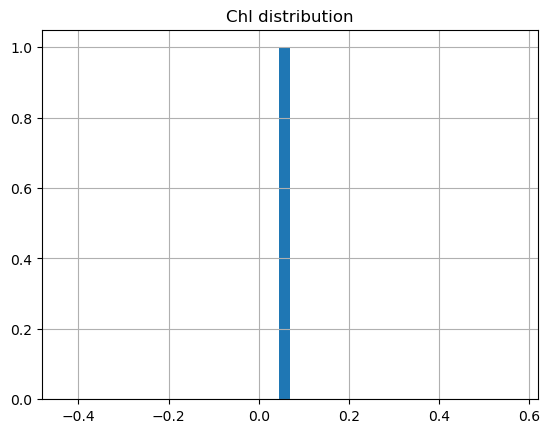

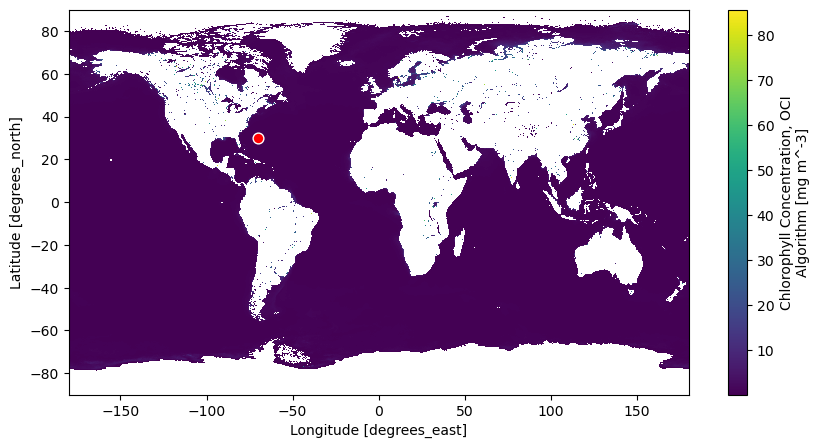

In [13]:
import pandas as pd, matplotlib.pyplot as plt, xarray as xr, os
m = pd.read_csv("data/processed/shark_tags_with_chl.csv")
plt.figure(); m['chl_nearest'].hist(bins=40); plt.title('Chl distribution'); plt.show()

fn = r"data\raw\shark\AQUA_MODIS.20020704_20250228.L3m.CU.CHL.chlor_a.9km.nc"
ds = xr.open_dataset(fn, engine='netcdf4', decode_times=True)
var = "chlor_a" if "chlor_a" in ds.data_vars else list(ds.data_vars)[0]
da = ds[var].isel(time=0) if 'time' in ds[var].dims else ds[var]
plt.figure(figsize=(10,5)); da.plot(); plt.scatter(m.lon, m.lat, c='red', s=60, edgecolor='white'); plt.show()

In [14]:
import pandas as pd, numpy as np

# paths (change if needed)
merged_fp = "data/processed/shark_tags_with_chl.csv"   # file you saved
out_fp = "data/processed/shark_tags_with_features.csv"

# load and quick fix
df = pd.read_csv(merged_fp)
df['time'] = pd.to_datetime(df.get('time', df.get('tag_time', df.get('tag_time_utc'))), errors='coerce')
df = df.sort_values(['animal_id','time']) if 'animal_id' in df.columns else df.sort_values(['time'])
print("Rows, cols:", df.shape)

Rows, cols: (1, 12)


In [15]:
from math import radians, sin, cos, asin, sqrt, atan2, degrees

def haversine(lon1, lat1, lon2, lat2):
    R = 6371000.0
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    return 2*R*asin(sqrt(a))

df = df.reset_index(drop=True)
grp_key = 'animal_id' if 'animal_id' in df.columns else None
out_rows = []
if grp_key:
    groups = df.groupby(grp_key)
else:
    groups = [(None, df)]

for name, g in groups:
    g = g.sort_values('time').reset_index(drop=True)
    g['lon_prev'] = g['lon'].shift(1)
    g['lat_prev'] = g['lat'].shift(1)
    g['time_prev'] = g['time'].shift(1)
    g['step_m'] = g.apply(lambda r: haversine(r['lon_prev'], r['lat_prev'], r['lon'], r['lat']) if pd.notna(r['lon_prev']) else np.nan, axis=1)
    g['dt_s'] = (g['time'] - g['time_prev']).dt.total_seconds()
    g['speed_m_s'] = g['step_m'] / g['dt_s']
    # compute bearings for turn angle
    def bearing(lon1, lat1, lon2, lat2):
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
        dlon = lon2 - lon1
        x = sin(dlon) * cos(lat2)
        y = cos(lat1)*sin(lat2) - sin(lat1)*cos(lat2)*cos(dlon)
        return atan2(x, y)
    g['bearing'] = g.apply(lambda r: bearing(r['lon_prev'], r['lat_prev'], r['lon'], r['lat']) if pd.notna(r['lon_prev']) else np.nan, axis=1)
    g['bearing_prev'] = g['bearing'].shift(1)
    # turn angle = smallest angle difference in degrees
    g['turn_deg'] = g.apply(lambda r: (degrees((r['bearing'] - r['bearing_prev'] + np.pi) % (2*np.pi) - np.pi)) if pd.notna(r['bearing']) and pd.notna(r['bearing_prev']) else np.nan, axis=1)
    out_rows.append(g)

df_features = pd.concat(out_rows, ignore_index=True)
df_features.to_csv(out_fp, index=False)
print("Saved movement features to", out_fp)
print(df_features[['lon','lat','time','step_m','speed_m_s','turn_deg']].head())

Saved movement features to data/processed/shark_tags_with_features.csv
    lon   lat                time  step_m  speed_m_s  turn_deg
0 -70.0  30.0 2002-07-04 12:00:00     NaN        NaN       NaN


In [16]:
df_features['chl_nearest'] = pd.to_numeric(df_features['chl_nearest'], errors='coerce')
eps = 1e-3
df_features['log_chl'] = np.log(df_features['chl_nearest'] + eps)
df_features['chl_valid'] = df_features['chl_nearest'].notna().astype(int)
df_features.to_csv(out_fp, index=False)
print("Added log_chl and chl_valid.")

Added log_chl and chl_valid.


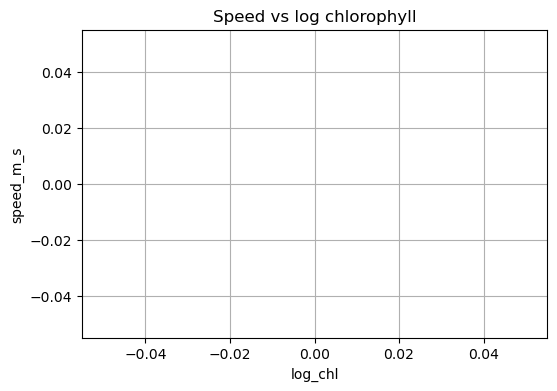

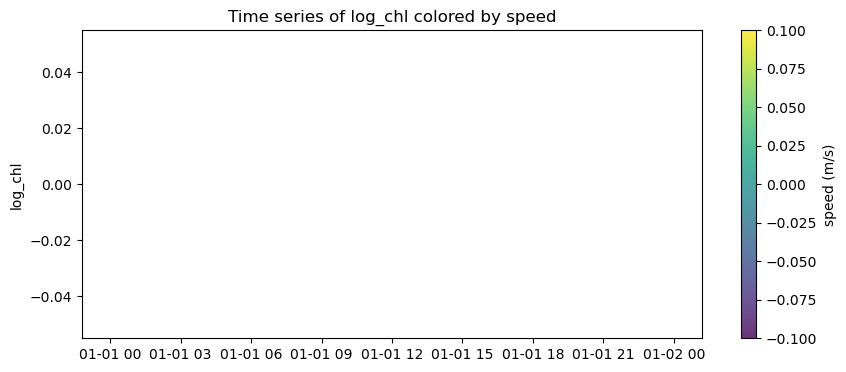

In [17]:
import matplotlib.pyplot as plt
dfp = df_features.copy()
plt.figure(figsize=(6,4))
plt.scatter(dfp['log_chl'], dfp['speed_m_s'], alpha=0.6)
plt.xlabel('log_chl'); plt.ylabel('speed_m_s'); plt.title('Speed vs log chlorophyll'); plt.grid(True); plt.show()

plt.figure(figsize=(10,4))
sc = plt.scatter(dfp['time'], dfp['log_chl'], c=dfp['speed_m_s'], cmap='viridis', alpha=0.8)
plt.colorbar(sc, label='speed (m/s)')
plt.ylabel('log_chl'); plt.title('Time series of log_chl colored by speed'); plt.show()

In [25]:
# run in the same notebook
import numpy as np, pandas as pd

print("Rows total:", len(df_features))
print("Columns available:", list(df_features.columns))

# Count non-missing and finite values
n_speed = df_features['speed_m_s'].notna().sum()
n_logchl = df_features['log_chl'].notna().sum()
n_both = df_features[['speed_m_s','log_chl']].dropna().shape[0]
print("Non-missing speed:", n_speed)
print("Non-missing log_chl:", n_logchl)
print("Rows with both:", n_both)

# Check for inf or extreme values
print("Any infinite speed?", np.isinf(df_features['speed_m_s']).any())
print("Any infinite log_chl?", np.isinf(df_features['log_chl']).any())
print("Speed summary:\n", df_features['speed_m_s'].describe())
print("log_chl summary:\n", df_features['log_chl'].describe())

Rows total: 1
Columns available: ['lon', 'lat', 'tag_time', 'sat_time', 'chl_nearest', 'chl_bilinear', 'chl_nearest.1', 'chl_bilinear.1', 'sat_time.1', 'sat_file', 'chl_flag', 'time', 'lon_prev', 'lat_prev', 'time_prev', 'step_m', 'dt_s', 'speed_m_s', 'bearing', 'bearing_prev', 'turn_deg', 'log_chl', 'chl_valid']
Non-missing speed: 0
Non-missing log_chl: 1
Rows with both: 0
Any infinite speed? False
Any infinite log_chl? False
Speed summary:
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: speed_m_s, dtype: float64
log_chl summary:
 count    1.000000
mean    -2.658614
std           NaN
min     -2.658614
25%     -2.658614
50%     -2.658614
75%     -2.658614
max     -2.658614
Name: log_chl, dtype: float64


In [26]:
# cleaning and preparing model dataframe
mdl_df = df_features[['speed_m_s','log_chl']].copy()

# replace inf with NaN, coerce non-numeric
mdl_df['speed_m_s'] = pd.to_numeric(mdl_df['speed_m_s'], errors='coerce').replace([np.inf,-np.inf], np.nan)
mdl_df['log_chl'] = pd.to_numeric(mdl_df['log_chl'], errors='coerce').replace([np.inf,-np.inf], np.nan)

# drop rows with missing predictors or response
mdl_df = mdl_df.dropna(subset=['speed_m_s','log_chl'])
print("Rows usable for model after clean:", len(mdl_df))

Rows usable for model after clean: 0


In [28]:
import os, glob, numpy as np, pandas as pd, xarray as xr

# inputs — adjust paths if needed
tags_fp = "data/processed/shark_tags_with_chl.csv"   # or your original tags file
sat_files = sorted(glob.glob(os.path.join("data","raw","shark","*.nc")))
max_days = 1   # tolerance in days

# load tags
tags = pd.read_csv(tags_fp)
tags['time'] = pd.to_datetime(tags.get('time', tags.get('tag_time', tags.get('tag_time_utc'))), errors='coerce')

# helper to parse date from file name (adjust if your name pattern differs)
def file_date_np(f):
    base = os.path.basename(f)
    # expects second token like YYYYMMDD in filenames used earlier
    try:
        return np.datetime64(base.split('.')[1][:8], 'D')
    except Exception:
        # fallback: file modification date
        return np.datetime64(pd.to_datetime(os.path.getmtime(f), unit='s').date())

file_dates = np.array([file_date_np(f) for f in sat_files])

# sampler that returns value and sat_time, or NaN if time gap > max_days
def sample_for_row(row):
    lon, lat = float(row['lon']), float(row['lat'])
    t = row['time']
    if pd.isna(t):
        # no tag time: fallback to nearest file (no time check)
        fn = sat_files[0]
    else:
        t64 = np.datetime64(t.date(), 'D')
        idx = int(np.abs(file_dates - t64).argmin())
        fn = sat_files[idx]
        day_diff = abs((file_dates[idx] - t64).astype('timedelta64[D]').astype(int))
        if day_diff > max_days:
            return {'chl_nearest': np.nan, 'chl_bilinear': np.nan, 'sat_time': None, 'sat_file': None}

    ds = xr.open_dataset(fn, engine='netcdf4', decode_times=True)
    var = "chlor_a" if "chlor_a" in ds.data_vars else list(ds.data_vars)[0]
    da = ds[var]
    # if dataset has time dimension, pick nearest time inside file
    if "time" in da.dims and not pd.isna(t):
        tidx = int(np.abs(ds['time'].values - np.datetime64(t)).argmin())
        da_slice = da.isel(time=tidx)
        sat_time = str(ds['time'].values[tidx])
    else:
        da_slice = da
        sat_time = None
    try:
        nearest = float(da_slice.sel(lon=lon, lat=lat, method='nearest').values)
    except Exception:
        nearest = np.nan
    try:
        bil = float(da_slice.interp(lon=lon, lat=lat).values)
    except Exception:
        bil = np.nan
    return {'chl_nearest': nearest, 'chl_bilinear': bil, 'sat_time': sat_time, 'sat_file': fn}

# Apply to tags (vectorized)
results = [sample_for_row(row) for _, row in tags.iterrows()]
res_df = pd.DataFrame(results)
merged = pd.concat([tags.reset_index(drop=True), res_df], axis=1)

# Save and report
out = "data/processed/shark_tags_with_chl_date_tolerance.csv"
os.makedirs(os.path.dirname(out), exist_ok=True)
merged.to_csv(out, index=False)
print("Saved:", out)
print("Total rows:", len(merged))
print("Rows with chl_nearest:", merged['chl_nearest'].notna().sum())

Saved: data/processed/shark_tags_with_chl_date_tolerance.csv
Total rows: 1
Rows with chl_nearest: chl_nearest    1
chl_nearest    0
dtype: int64


In [29]:
import pandas as pd, numpy as np
m = pd.read_csv("data/processed/shark_tags_with_chl_date_tolerance.csv")
print("Rows total:", len(m))
print("Unique animals:", m['animal_id'].nunique() if 'animal_id' in m.columns else "no animal_id column")
print("Unique times:", m['time'].nunique() if 'time' in m.columns else "no time column")
print("Non-missing chl_nearest:", m['chl_nearest'].notna().sum())
print("Columns:", list(m.columns))

Rows total: 1
Unique animals: no animal_id column
Unique times: 1
Non-missing chl_nearest: 1
Columns: ['lon', 'lat', 'tag_time', 'sat_time', 'chl_nearest', 'chl_bilinear', 'chl_nearest.1', 'chl_bilinear.1', 'sat_time.1', 'sat_file', 'chl_flag', 'time', 'chl_nearest.2', 'chl_bilinear.2', 'sat_time.2', 'sat_file.1']


In [30]:
import pandas as pd, os

tags_fp = r"C:\Users\amishavandithadell\Music\Sharks\data\processed\shark_chl_samples.csv"  # <-- your original tags CSV
print("Exists:", os.path.exists(tags_fp))
tags = pd.read_csv(tags_fp)
print("Rows, cols:", tags.shape)
print("Columns:", list(tags.columns))
print(tags.head(8))

Exists: True
Rows, cols: (1, 6)
Columns: ['tag_lon', 'tag_lat', 'tag_time', 'sat_time', 'chl_nearest', 'chl_bilinear']
   tag_lon  tag_lat             tag_time  sat_time  chl_nearest  chl_bilinear
0    -70.0     30.0  2002-07-04T12:00:00       NaN     0.069045           NaN


In [31]:
import os, glob, numpy as np, pandas as pd, xarray as xr

# ADJUST this to the folder where all your raw tag CSVs live
tags_folder = r"C:\Users\amishavandithadell\Documents\SharkProject\data"
csvs = sorted(glob.glob(os.path.join(tags_folder, "*.csv")))
print("Found CSVs:", csvs)

# load and concat
dfs = []
for f in csvs:
    d = pd.read_csv(f)
    dfs.append(d)
tags = pd.concat(dfs, ignore_index=True)
print("Combined rows:", len(tags), "columns:", list(tags.columns))

# normalize common names to lon,lat,time
rename_map = {}
if 'tag_lon' in tags.columns: rename_map['tag_lon']='lon'
if 'tag_lat' in tags.columns: rename_map['tag_lat']='lat'
for c in ['tag_time','tag_time_utc','timestamp','time']:
    if c in tags.columns and 'time' not in rename_map.values():
        rename_map[c] = 'time'
tags = tags.rename(columns=rename_map)
if 'time' in tags.columns:
    tags['time'] = pd.to_datetime(tags['time'], errors='coerce')

# quick check: need at least 2 rows total or >1 row per animal for movement features
print("Unique animals (if present):", tags['animal_id'].nunique() if 'animal_id' in tags.columns else "no animal_id")
print("Rows after concat:", len(tags))
if len(tags) <= 1:
    print("Only one row total — stop. You need the full track CSVs to proceed.")
else:
    # sampler: ±3 day mean
    sat_files = sorted(glob.glob(os.path.join("data","raw","shark","*.nc")))
    assert len(sat_files)>0, "No satellite files found in data/raw/shark"
    def file_date_np(f):
        base = os.path.basename(f)
        try:
            return np.datetime64(base.split('.')[1][:8], 'D')
        except:
            return np.datetime64(pd.to_datetime(os.path.getmtime(f), unit='s').date())
    file_dates = np.array([file_date_np(f) for f in sat_files])
    def mean_window_sample(row, window_days=3):
        lon = float(row['lon']); lat = float(row['lat'])
        t = row['time']
        if pd.isna(t):
            return {'chl_mean': np.nan, 'sat_files': None}
        t64 = np.datetime64(t.date(), 'D')
        diffs = np.abs((file_dates - t64).astype('timedelta64[D]').astype(int))
        sel_idx = np.where(diffs <= window_days)[0]
        if len(sel_idx) == 0:
            return {'chl_mean': np.nan, 'sat_files': None}
        vals=[]; used=[]
        for i in sel_idx:
            fn = sat_files[i]; ds = xr.open_dataset(fn, engine='netcdf4', decode_times=True)
            var = "chlor_a" if "chlor_a" in ds.data_vars else list(ds.data_vars)[0]; da = ds[var]
            try:
                if 'time' in da.dims:
                    tidx = int(np.abs(ds['time'].values - np.datetime64(t)).argmin())
                    da_slice = da.isel(time=tidx)
                else:
                    da_slice = da
                v = float(da_slice.sel(lon=lon, lat=lat, method='nearest').values)
                vals.append(v); used.append(fn)
            except Exception:
                continue
        if len(vals)==0:
            return {'chl_mean': np.nan, 'sat_files': None}
        return {'chl_mean': float(np.nanmean(vals)), 'sat_files': ';'.join(used)}
    # apply (may be slow for many rows)
    res = [mean_window_sample(row, window_days=3) for _, row in tags.iterrows()]
    res_df = pd.DataFrame(res)
    out = pd.concat([tags.reset_index(drop=True), res_df], axis=1)
    out_fp = os.path.join("data","processed","shark_chl_3day_mean_from_raw_tags.csv")
    os.makedirs(os.path.dirname(out_fp), exist_ok=True)
    out.to_csv(out_fp, index=False)
    print("Saved:", out_fp)
    print("Rows:", len(out), "Rows with chl_mean:", out['chl_mean'].notna().sum())

Found CSVs: []


ValueError: No objects to concatenate